In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
from matplotlib.pyplot import subplots, cm
from sklearn.inspection import DecisionBoundaryDisplay

### Model Training with Support Vector Classifier

In [2]:
df = pd.read_csv('/Users/jaylensheard/Downloads/customer_churn_data.csv')

In [3]:
# Assigning the data to x and y
x = df[['logins_per_month', 'hours_watched']]
y = df['churn']

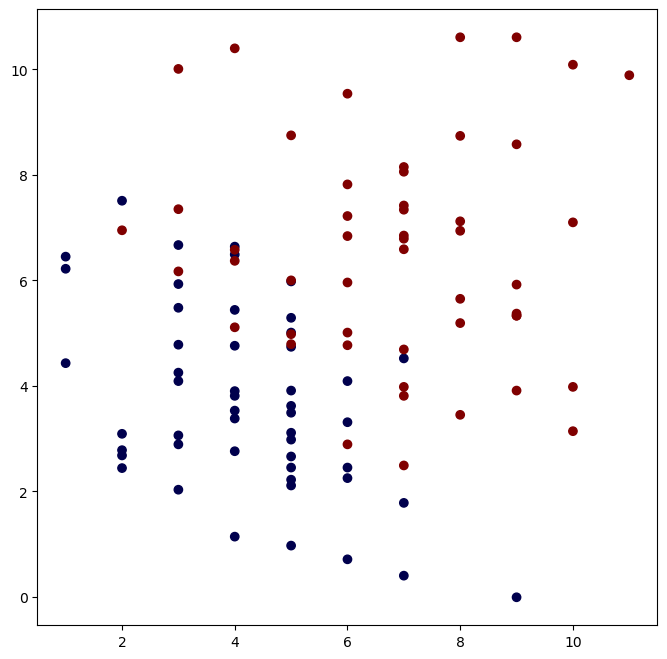

In [4]:
X = x.values
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.seismic)

In [5]:
# Train test split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 1/3, random_state = 42)

In [6]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [7]:
# Defining the parameter range
param_grid = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fitting the model
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [8]:
# Get the best parameters and accuracy
best_params = grid.best_params_
best_accuracy = grid.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")

Best Parameters: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8714285714285713


In [9]:
# Create the SVM model with best parameters
best_svm = SVC(C=0.01, gamma=0.1, kernel='rbf') 

# Fit the model
best_svm.fit(x_train_scaled, y_train)

SVC(C=0.01, gamma=0.1)

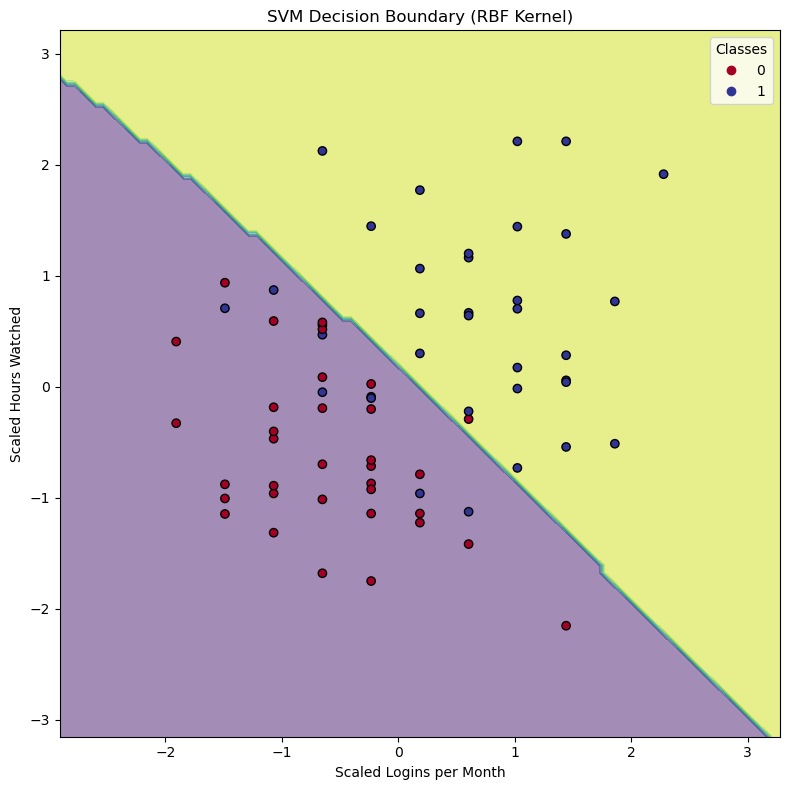

In [10]:
# Create subplot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    best_svm,
    x_train_scaled,
    response_method="predict",
    ax=ax,
    alpha=0.5
)

# Plot the training points
scatter = ax.scatter(x_train_scaled[:, 0],
                     x_train_scaled[:, 1],
                     c=y_train, 
                     cmap=plt.cm.RdYlBu,
                     edgecolor="black")

# Set labels and title
ax.set_xlabel('Scaled Logins per Month')
ax.set_ylabel('Scaled Hours Watched')
ax.set_title('SVM Decision Boundary (RBF Kernel)')

# Add legend
ax.legend(*scatter.legend_elements(), title="Classes")

# Show plot
plt.tight_layout()
plt.show()

In [11]:
# Predict on validation set
y_val_pred = best_svm.predict(x_val_scaled)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Valication Accuracy: {val_accuracy}")

Valication Accuracy: 0.8


In [12]:
# Classification report
print("Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=['Churned','Not Churned']))

Classification Report (Validation Set):

              precision    recall  f1-score   support

     Churned       0.71      1.00      0.83        10
 Not Churned       1.00      0.60      0.75        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20



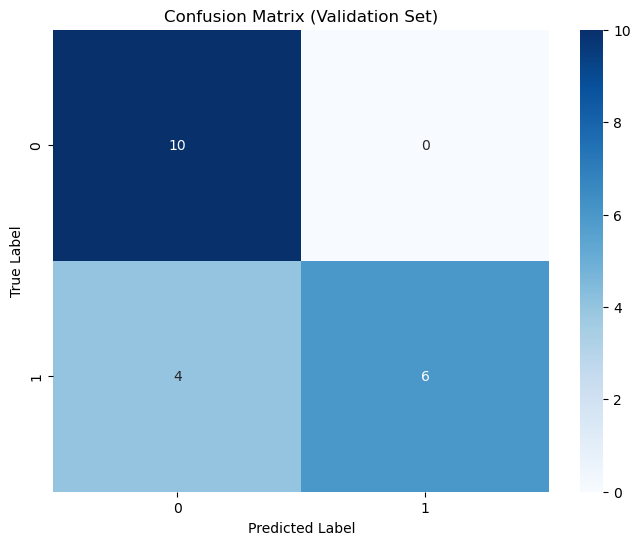

In [13]:
# Confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
# Get distance from decision boundary
y_val_prob = best_svm.decision_function(x_val_scaled)
print(y_val_prob)

[-0.09071159 -0.1255116   0.03197839 -0.08922416  0.05047576  0.07203227
 -0.05335924 -0.00467915 -0.08377253 -0.02788501 -0.08254631  0.13009106
  0.07812041 -0.0649969  -0.08266778 -0.00822311 -0.01086872 -0.00412725
 -0.00599018  0.03924735]


In [15]:
# Calculating additional metrics
tn, fp, fn, tp = cm_val.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 1.0
Recall: 0.6
F1 Score: 0.7499999999999999


In [16]:
# Compare validation accuracy with best cross-validation score
print(f"\nBest Cross-Validation Score: {grid.best_score_:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Best Cross-Validation Score: 0.8714
Validation Accuracy: 0.8000


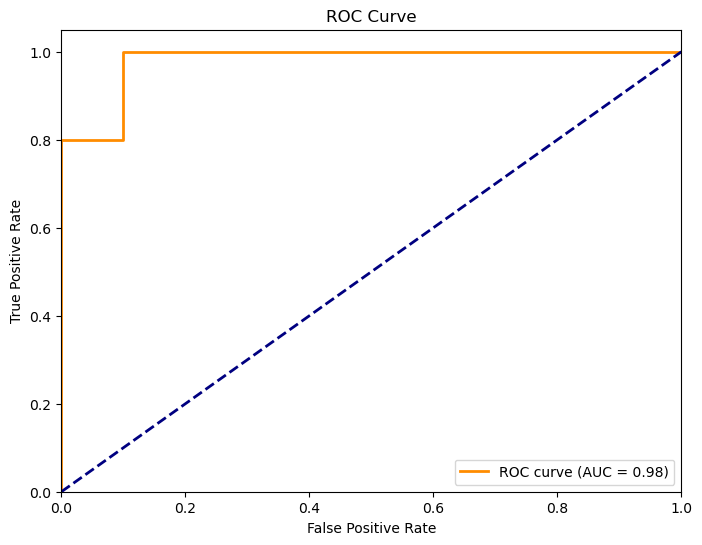

In [17]:
from sklearn.metrics import roc_curve, auc 

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Get the probabilities for the positive class
best_svm_proba = SVC(C=0.01, gamma=0.1, kernel='rbf', probability=True)
best_svm_proba.fit(x_train_scaled, y_train)

# Get probability estimates for the validation set
y_val_proba = best_svm_proba.predict_proba(x_val_scaled)[:, 1]
print(y_val_proba)

[0.52698707 0.53055377 0.51439898 0.52683458 0.51249962 0.51028576
 0.52315677 0.51816203 0.52627565 0.52054341 0.52614993 0.5
 0.50966044 0.52435037 0.52616238 0.51852576 0.51879727 0.51810539
 0.51829659 0.51365262]


In [43]:
# Set a custom threshold
threshold = -0.011
y_val_pred0 = (y_val_prob > threshold).astype(int)

In [44]:
# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred0)
print(f"Valication Accuracy: {val_accuracy}")

Valication Accuracy: 0.95


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate metrics
precision = precision_score(y_val, y_val_pred0)
recall = recall_score(y_val, y_val_pred0)
f1 = f1_score(y_val, y_val_pred0)
cm0 = confusion_matrix(y_val, y_val_pred0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9090909090909091
Recall: 1.0
F1 Score: 0.9523809523809523


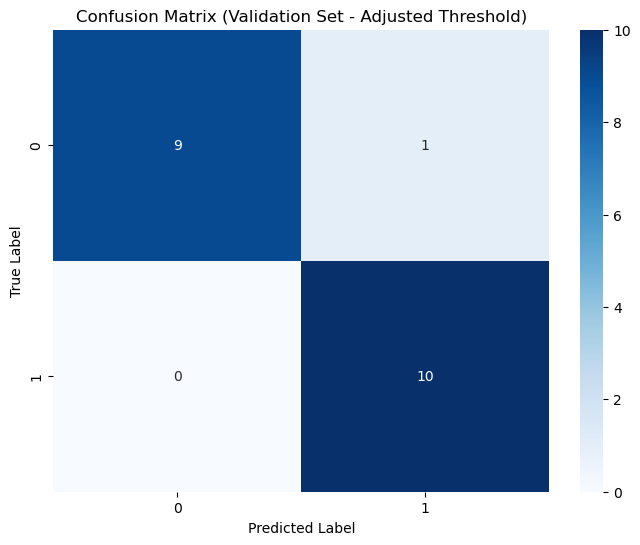

In [46]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm0, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set - Adjusted Threshold)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [47]:
y_test_prob = best_svm.decision_function(x_test_scaled)

# Make predictions using the optimal threshold
y_test_pred = (y_test_prob > threshold).astype(int)

In [48]:
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8


In [50]:
# Classification report on test set
print("Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred, target_names=['Churned','Not Churned']))

Classification Report (Test Set):

              precision    recall  f1-score   support

     Churned       0.71      1.00      0.83         5
 Not Churned       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



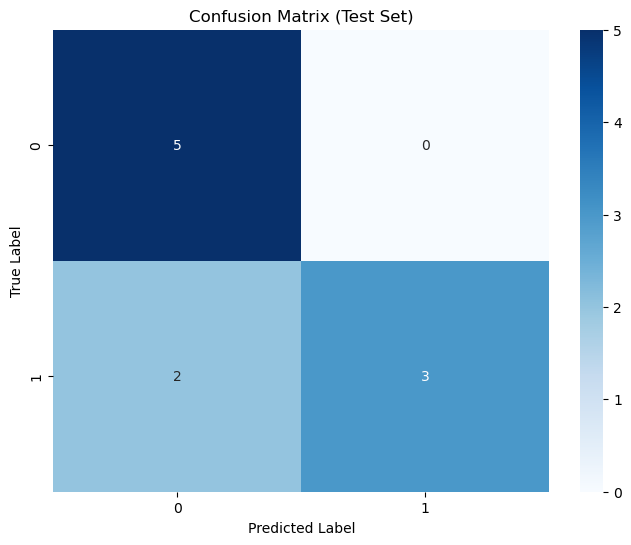

In [51]:
# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [26]:
# Calculating additional metrics
tn, fp, fn, tp = cm_test.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 1.0
Recall: 0.6
F1 Score: 0.7499999999999999


In [27]:
# Compare validation accuracy with best cross-validation score
print(f"\nBest Cross-Validation Score: {grid.best_score_:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Cross-Validation Score: 0.8714
Test Accuracy: 0.8000


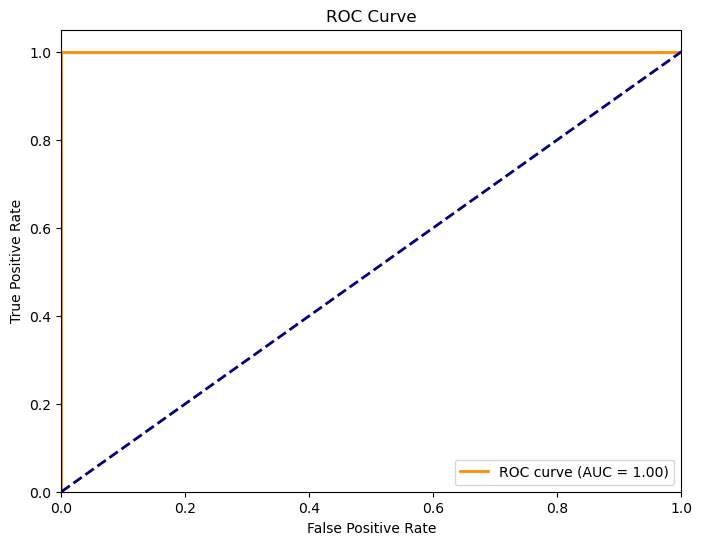

In [28]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Model Training based on Earnings

In [29]:
# Earnings function 
def calculate_earnings(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    return (15 * tn) + (10 * tp) + (0 * fn) - (5 * fp)

In [30]:
# Defining the paramaters
param_grid = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = False)

# Fitting the model
grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             refit=False)

In [31]:
# Calculate earnings for model
earnings_list = []
for model in grid.cv_results_['params']:
    svm = SVC(C = model['C'], gamma = model['gamma'], kernel = model['kernel'])
    svm.fit(x_train_scaled, y_train)
    y_val_pred = svm.predict(x_val_scaled)
    cm = confusion_matrix(y_val, y_val_pred)
    earnings = calculate_earnings(cm)
    earnings_list.append((model, earnings))

In [32]:
# Model with the maximum earnings
best_model = max(earnings_list, key=lambda x: x[1])
print(f"Best model: {best_model[0]} with earnings: ${best_model[1]}")

Best model: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with earnings: $250


In [33]:
# Create the SVM model with best parameters
best_svm0 = SVC(C=best_model[0]['C'], gamma=best_model[0]['gamma'], kernel=best_model[0]['kernel'])

# Fit the model
best_svm0.fit(x_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [34]:
# Apply model on the test set
y_test_pred0 = best_svm.predict(x_test_scaled)
cm_test = confusion_matrix(y_test, y_test_pred0)

In [35]:
# Calculate total earnings on the test set
test_earnings = calculate_earnings(cm_test)
average_earnings_per_person = test_earnings / len(y_test)
print(f"Total Earnings: {test_earnings}")
print(f"Average Earnings: {average_earnings_per_person}")

Total Earnings: 95
Average Earnings: 9.5


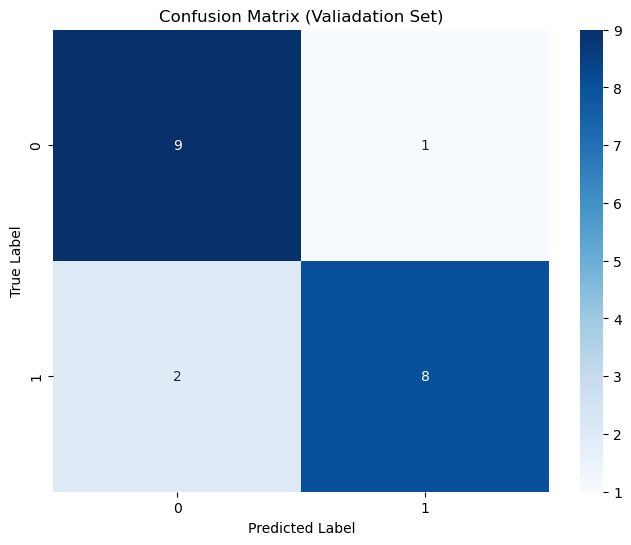

In [36]:
# Confusion matrix
cm_test = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Valiadation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Implementing KMeans on Iris Dataset

In [37]:
import os
os.environ["OMP_NUM_THREADS"]  = "1"
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [38]:
# Load iris dataset
iris = load_iris()
X = iris.data

In [39]:
# Loop to find optimal clusters
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

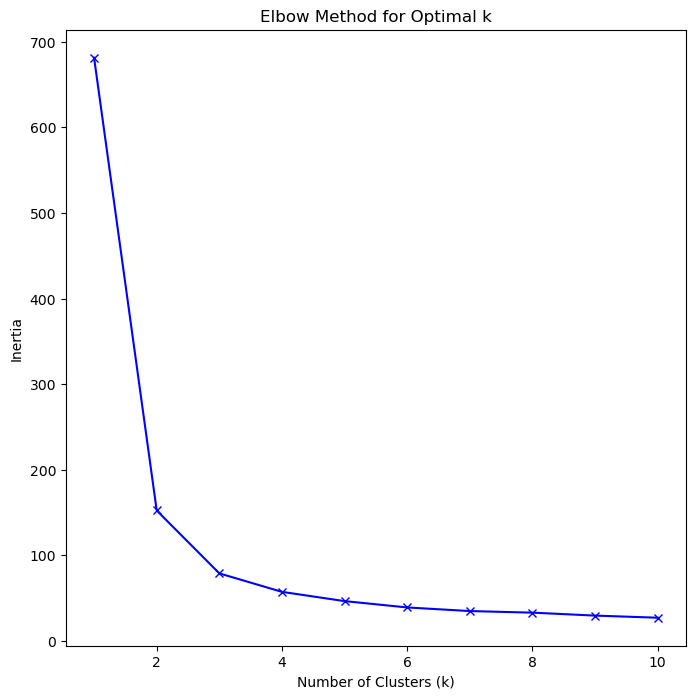

In [40]:
# Plot elbow curve
plt.figure(figsize=(8, 8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [41]:
# Plugging in optimal k (3)
best_k = 3
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(X)

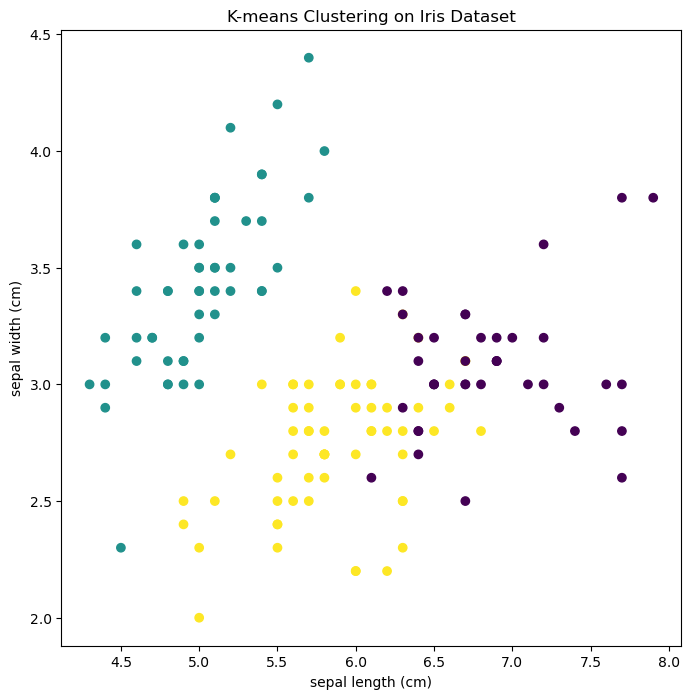

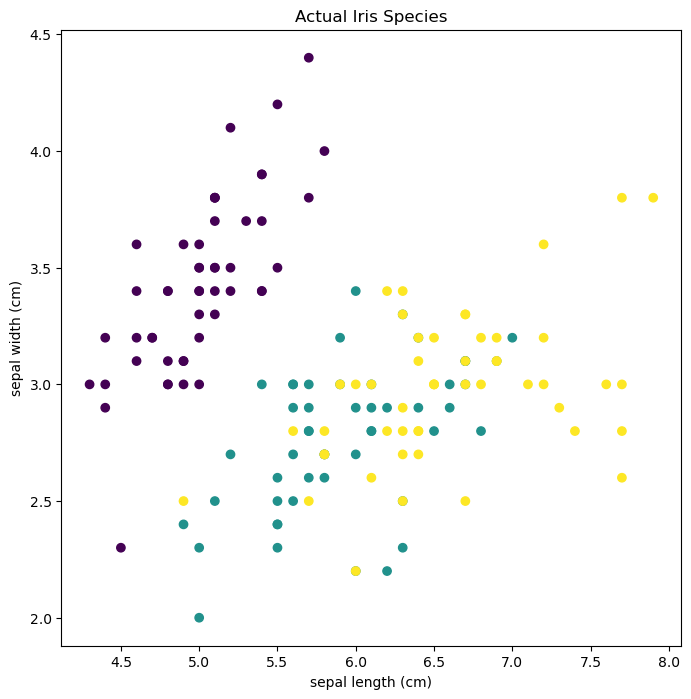

In [42]:
# Comparing clusters to actual labels
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering on Iris Dataset')
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Actual Iris Species')
plt.show()